In [1]:
!pip install pandas

import pandas as pd


In [2]:
!conda install -c conda-forge fbprophet --yes


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [3]:
from fbprophet import Prophet


Importing plotly failed. Interactive plots will not work.


In [12]:
data = pd.read_csv("GOOG (4).csv")   #predictive model file, data taken from 01/20/2016 - 01/20/2020
                                     
data2 = pd.read_csv("GOOG (3).csv") #actual model file, data taken from 01/20/2020 - 09/05/2020

from fbprophet.plot import plot_plotly, plot_components_plotly

data=data.rename(columns={'Date':'ds', 'Close':'y'})
data2=data2.rename(columns={'Date':'ds', 'Close':'y'})

In [13]:
data.head()

,ds,Open,High,Low,y,Adj Close,Volume
0,2016-01-18,688.609985,728.130005,673.260010,725.250000,725.250000,7869000
1,2016-01-25,723.580017,744.989990,694.390015,742.950012,742.950012,11388300
2,2016-02-01,750.460022,789.869995,680.150024,683.570007,683.570007,27932700
3,2016-02-08,667.849976,701.309998,663.059998,682.400024,682.400024,15659700
4,2016-02-15,692.979980,712.349976,685.049988,700.909973,700.909973,8485100


In [14]:
m = Prophet(yearly_seasonality = True)
m.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
future = m.make_future_dataframe(periods = 228)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
432,2020-08-24,1486.472539,1419.072299,1550.175855
433,2020-08-25,1487.073812,1418.760445,1549.704994
434,2020-08-26,1487.729920,1418.904388,1551.775261
435,2020-08-27,1488.433961,1421.039376,1554.696641
436,2020-08-28,1489.179499,1421.839555,1551.782771


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0, 0.5, 'Close of stock')

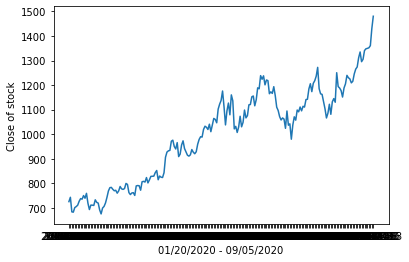

In [16]:
import matplotlib.pyplot as plt

plt.plot(data2.ds,data2.y)
plt.xlabel('01/20/2020 - 09/05/2020')
plt.ylabel('Close of stock')


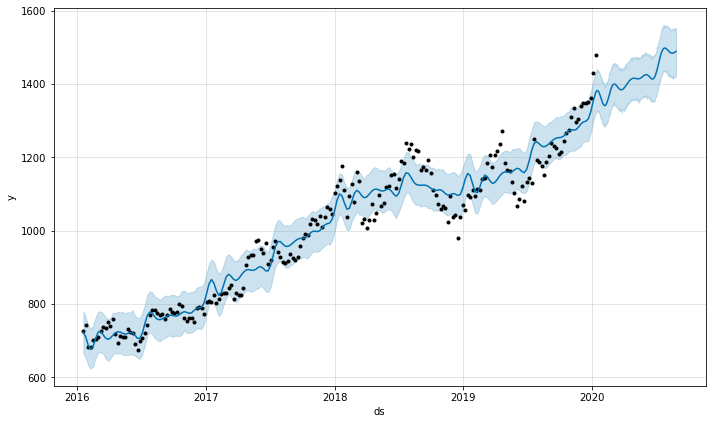

In [17]:
fig1 = m.plot(forecast)

In [18]:
data2.tail()

,ds,Open,High,Low,y,Adj Close,Volume
204,2019-12-16,1356.500000,1365.000000,1348.984985,1349.589966,1349.589966,9558800
205,2019-12-23,1355.869995,1364.530029,1342.780029,1351.890015,1351.890015,2936500
206,2019-12-30,1350.000000,1372.500000,1329.084961,1360.660034,1360.660034,4605700
207,2020-01-06,1350.000000,1434.928955,1350.000000,1429.729980,1429.729980,8084600
208,2020-01-13,1436.130005,1481.295044,1426.020020,1480.390015,1480.390015,8063800


In [19]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
432,2020-08-24,1490.703974,1419.072299,1550.175855,1457.536405,1520.882038,-4.231436,-4.231436,-4.231436,-4.231436,-4.231436,-4.231436,0.0,0.0,0.0,1486.472539
433,2020-08-25,1491.403836,1418.760445,1549.704994,1458.076578,1521.818678,-4.330024,-4.330024,-4.330024,-4.330024,-4.330024,-4.330024,0.0,0.0,0.0,1487.073812
434,2020-08-26,1492.103698,1418.904388,1551.775261,1458.619002,1522.749198,-4.373777,-4.373777,-4.373777,-4.373777,-4.373777,-4.373777,0.0,0.0,0.0,1487.729920
435,2020-08-27,1492.803559,1421.039376,1554.696641,1459.101880,1523.669585,-4.369599,-4.369599,-4.369599,-4.369599,-4.369599,-4.369599,0.0,0.0,0.0,1488.433961
436,2020-08-28,1493.503421,1421.839555,1551.782771,1459.511458,1524.589972,-4.323921,-4.323921,-4.323921,-4.323921,-4.323921,-4.323921,0.0,0.0,0.0,1489.179499


In [2]:
alphabet_impact = (1480.390015-1489.179499)/1489.179499 * 100
print("Alphabet's stocks have been impacted against the normal flow by Covid-19(from when the first case was reported in the USA) by\n",alphabet_impact,"%")

Alphabet's stocks have been impacted against the normal flow by Covid-19(from when the first case was reported in the USA) by
 -0.5902232743535861 %
